In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import cm, patches
from shapely.geometry import Point
from geopandas import GeoDataFrame

df = pd.read_csv('../../data/DATA_2.csv', delimiter=',', parse_dates=['Datetime'])

In [8]:
df.Longitude.max()

-85.5467

In [3]:
df_geometry = df[["Latitude","Longitude"]]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_geometry)
X = scaler.transform(df_geometry)

In [5]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

kmeans = KMeans(n_clusters=2, random_state=4,max_iter=3000)
kmeans.fit(X)

df_geometry["group"]=kmeans.labels_
df["group"]=kmeans.labels_

C:\Users\fof\miniconda3\envs\SeismicPrediction\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [6]:
df_map_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_map_mexico = df_map_world.loc[df_map_world.name == "Mexico",:]

In [7]:
seismic_geometry = [Point(lat,lng) for lat,lng in zip(df_geometry["Longitude"],df_geometry["Latitude"])]
gdf_seismic_geometry = GeoDataFrame(df_geometry, geometry=seismic_geometry)

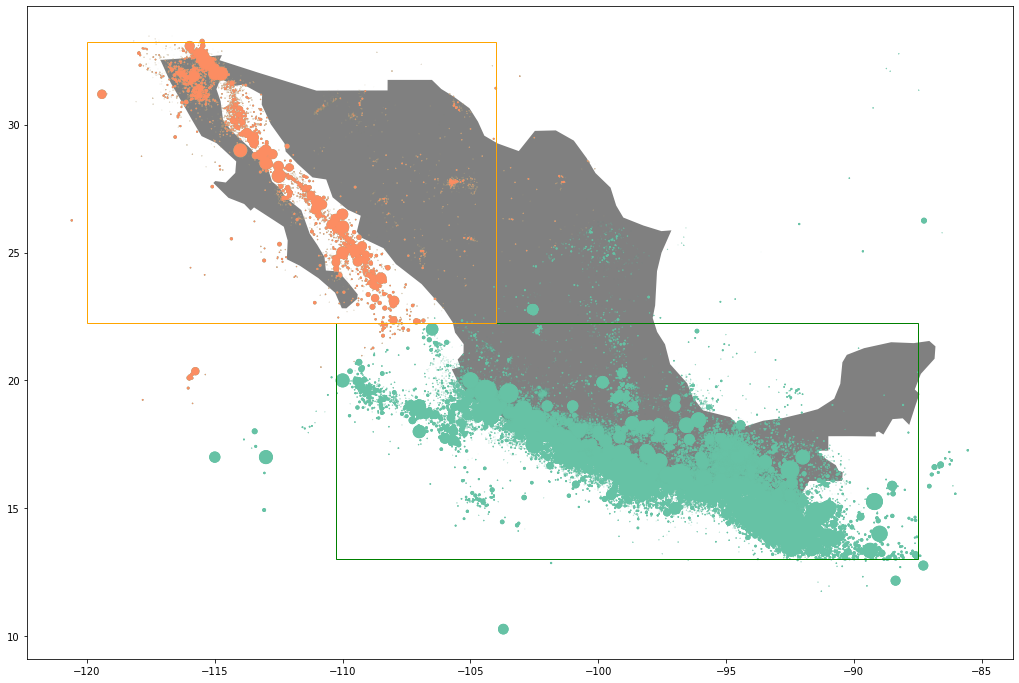

In [16]:
cmap = cm.get_cmap('Set2')

ax=df_map_mexico.plot(figsize=(20, 12),color="grey")
gdf_seismic_geometry.plot(ax=ax,color=(cmap(0)),markersize=(df.Magnitude-3.5).pow(4))
gdf_seismic_geometry.plot(ax=ax,color=df_geometry.group.map(cmap),markersize=(df.Magnitude-3.5).pow(4))

#south
x1_s=-110.25
y1_s=22.25
x2_s=-87.5
y2_s=13

#north
x1_n=-120
y1_n=33.25
x2_n= -104
y2_n= y1_s

rect_south = patches.Rectangle((x1_s, y1_s), x2_s-x1_s, y2_s-y1_s, linewidth=1, edgecolor='green', facecolor='none')
rect_north = patches.Rectangle((x1_n, y1_n), x2_n-x1_n, y2_n-y1_n, linewidth=1, edgecolor='orange', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect_south)
ax.add_patch(rect_north)

In [9]:
a=pd.DataFrame()
a["count"]=df.groupby("group")["group"].count()
a[["MagnitudeMean","DepthMean"]]=df.groupby("group")[["Magnitude","Depth"]].mean()

In [10]:
sur=df[df["group"]==0].drop("group",axis=1)
norte=df[df["group"]==1].drop("group",axis=1)

In [11]:
sur=df[df["group"]==0].drop("group",axis=1)
norte=df[df["group"]==1].drop("group",axis=1)

In [12]:
norte.to_csv("../../data/DATA_2_north.csv", index=False)
sur.to_csv("../../data/DATA_2_south.csv", index=False)


In [13]:
from model import REGION

In [14]:
df_south_sq= df[(df.Longitude > REGION.SOUTH.x1)&( df.Latitude < REGION.SOUTH.y1)&
                (df.Longitude < REGION.SOUTH.x2)&(df.Latitude > REGION.SOUTH.y2)]
df_south_sq.reset_index(inplace=True,drop=True)


In [ ]:
df_north_sq= df[(df.Longitude > x1_n)&( df.Latitude < y1_n)&(df.Longitude < x2_n)&(df.Latitude > y2_n)]
df_north_sq.reset_index(inplace=True,drop=True)